In [17]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\Kathy San\Downloads\movies.csv\movies.csv')

In [88]:
# Check Data
df.head()

year  score      votes     budget       gross  runtime
5445  2009    7.8  1100000.0  237000000  2847246203    162.0
7445  2019    8.4   903000.0  356000000  2797501328    181.0
3045  1997    7.8  1100000.0  200000000  2201647264    194.0
6663  2015    7.8   876000.0  245000000  2069521700    138.0
7244  2018    8.4   897000.0  321000000  2048359754    149.0

In [20]:
#Check For Missing Data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [21]:
#Column Data Types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [27]:
#Updating Column Data Types
df['budget'] = (df['budget'].astype(int64)')
df['gross'] = (df['gross'].astype(int64)')

In [30]:
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States         0   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0   

          gross                    company  runtime  
0      46998772               Warner Bros.    146.0  
1      58853106          Columbia Pictures    104.0  
2     538375067                  Lucasfilm    124.0  
3      83453539         Paramount Pictures     88.0  
4      39846344             Orion Pictures     98.0  
...         ...                        ...      ...  
7663          0                        NaN     90.0  
7664          0  Cactus Blue Entertainment     90.0  
7665          0           Embi Productions      NaN  
7666          0                        NaN    120.0  
7667          0                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [32]:
#Construct Correct Year Identifier
df['yearcorrect'] = df['released'].astype(str).str[:4]

In [104]:
df.head()

year  score      votes     budget       gross  runtime
5445  2009    7.8  1100000.0  237000000  2847246203    162.0
7445  2019    8.4   903000.0  356000000  2797501328    181.0
3045  1997    7.8  1100000.0  200000000  2201647264    194.0
6663  2015    7.8   876000.0  245000000  2069521700    138.0
7244  2018    8.4   897000.0  321000000  2048359754    149.0

In [46]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [39]:
pd.set_option('display.max_rows', None)

In [41]:
#Drop Duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [87]:
df

year  score      votes     budget       gross  runtime
5445  2009    7.8  1100000.0  237000000  2847246203    162.0
7445  2019    8.4   903000.0  356000000  2797501328    181.0
3045  1997    7.8  1100000.0  200000000  2201647264    194.0
6663  2015    7.8   876000.0  245000000  2069521700    138.0
7244  2018    8.4   897000.0  321000000  2048359754    149.0
7480  2019    6.9   222000.0  260000000  1670727580    118.0
6653  2015    7.0   593000.0  150000000  1670516444    124.0
6043  2012    8.0  1300000.0  220000000  1518815515    143.0
6646  2015    7.1   370000.0  190000000  1515341399    137.0
7494  2019    6.8   148000.0  150000000  1450026933    103.0
6644  2015    7.3   777000.0  250000000  1402809540    141.0
7247  2018    7.3   661000.0  200000000  1347597973    134.0
5845  2011    8.1   790000.0  125000000  1342321665    130.0
7075  2017    7.0   581000.0  317000000  1332698830    152.0
7271  2018    6.2   277000.0  170000000  1310466296    128.0
6262  2013    7.4   585000.0  150000000  1281508100    102.0
7072  2017    7.1   283000.0  160000000  1264434525    129.0
7281  2018    7.6   263000.0  200000000  1244639527    118.0
7055  2017    6.6   214000.0  250000000  1236005118    136.0
6244  2013    7.1   779000.0  200000000  1214811252    130.0
6688  2015    6.4   218000.0   74000000  1159444662     91.0
6846  2016    7.8   694000.0  250000000  1153337496    147.0
7250  2018    6.9   404000.0  160000000  1148485886    143.0
4245  2003    8.9  1700000.0   94000000  1146030912    201.0
7458  2019    7.5   359000.0  160000000  1131927996    129.0
7456  2019    6.8   478000.0  160000000  1128462972    123.0
5878  2011    6.2   390000.0  195000000  1123794079    154.0
6059  2012    7.7   642000.0  200000000  1108569499    143.0
6494  2014    5.6   302000.0  210000000  1104054072    165.0
2448  1994    8.5   970000.0   45000000  1083720877     88.0
6047  2012    8.4  1600000.0  250000000  1081142612    164.0
7463  2019    6.5   394000.0  275000000  1078232589    141.0
7450  2019    8.4  1000000.0   55000000  1074427370    122.0
7488  2019    7.7   217000.0  200000000  1073394593    100.0
5685  2010    8.2   776000.0  200000000  1066970811    103.0
4852  2006    7.3   668000.0  225000000  1066179747    151.0
6869  2016    7.8   572000.0  200000000  1056057720    133.0
7481  2019    6.9   239000.0  183000000  1050693953    128.0
5860  2011    6.6   492000.0  250000000  1045713802    136.0
7140  2017    6.3   119000.0   80000000  1034800131     89.0
2245  1993    8.1   894000.0   63000000  1033928303    127.0
6908  2016    7.3   250000.0  200000000  1028570942     97.0
3451  1999    6.5   748000.0  115000000  1027082707    136.0
5667  2010    6.4   392000.0  200000000  1025468216    108.0
6863  2016    8.0   450000.0  150000000  1024121104    108.0
6045  2012    7.8   773000.0  180000000  1017003568    169.0
3843  2001    7.6   685000.0  125000000  1006968171    152.0
5243  2008    9.0  2400000.0  185000000  1005973645    152.0
5652  2010    7.7   495000.0          0   977043483    146.0
6311  2013    7.3   377000.0   76000000   970766005     98.0
6905  2016    7.4   264000.0  175000000   966554929    106.0
7051  2017    6.9   336000.0   90000000   962542945    119.0
6455  2014    7.4   487000.0  250000000   962182865    144.0
5060  2007    7.1   608000.0  300000000   960996492    169.0
6253  2013    7.8   615000.0  225000000   959007513    161.0
4048  2002    8.7  1500000.0   94000000   947495095    179.0
5051  2007    7.5   527000.0  150000000   942172396    138.0
4259  2003    8.1   972000.0   94000000   940352645    100.0
5451  2009    7.6   492000.0  250000000   934454096    153.0
4476  2004    7.2   431000.0  150000000   928760770     93.0
7246  2018    7.9   476000.0   52000000   911902649    134.0
3845  2001    8.8  1700000.0   93000000   897690072    178.0
4643  2005    7.7   566000.0  150000000   896678241    157.0
5057  2007    6.2   513000.0  258000000   894983373    139.0
5539  2009    6.9   230000.0   90000000  

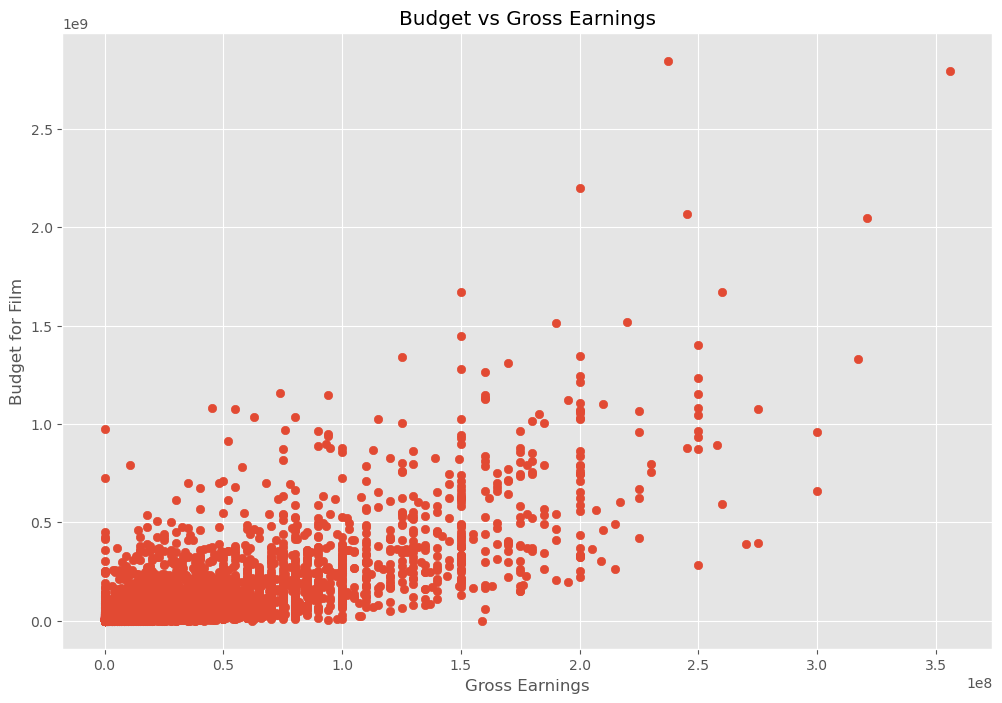

In [48]:
#Comparing Budgets vs Gross using Scatter plot

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [85]:
df.head()

year  score      votes     budget       gross  runtime
5445  2009    7.8  1100000.0  237000000  2847246203    162.0
7445  2019    8.4   903000.0  356000000  2797501328    181.0
3045  1997    7.8  1100000.0  200000000  2201647264    194.0
6663  2015    7.8   876000.0  245000000  2069521700    138.0
7244  2018    8.4   897000.0  321000000  2048359754    149.0

<Axes: xlabel='budget', ylabel='gross'>

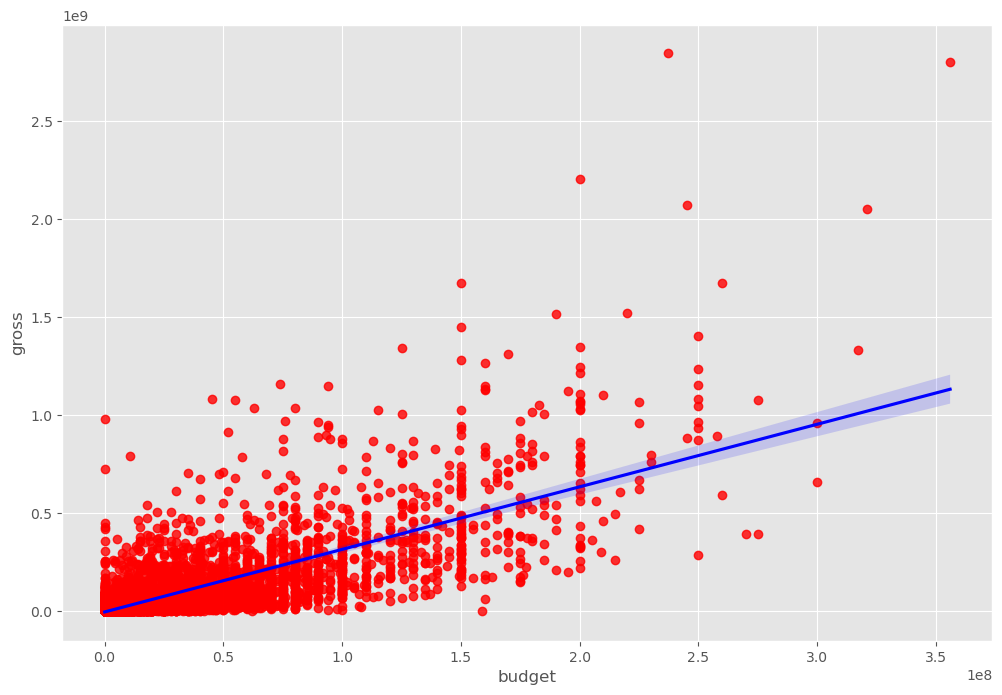

In [53]:
# Plot Budget vs Gross Using Seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [56]:
#Checking Correlation

In [92]:
df.corr(method='pearson')

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.632834  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632834  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309212  0.269510  0.245235  1.000000

In [71]:
#High Correlation Between Budget and Gross

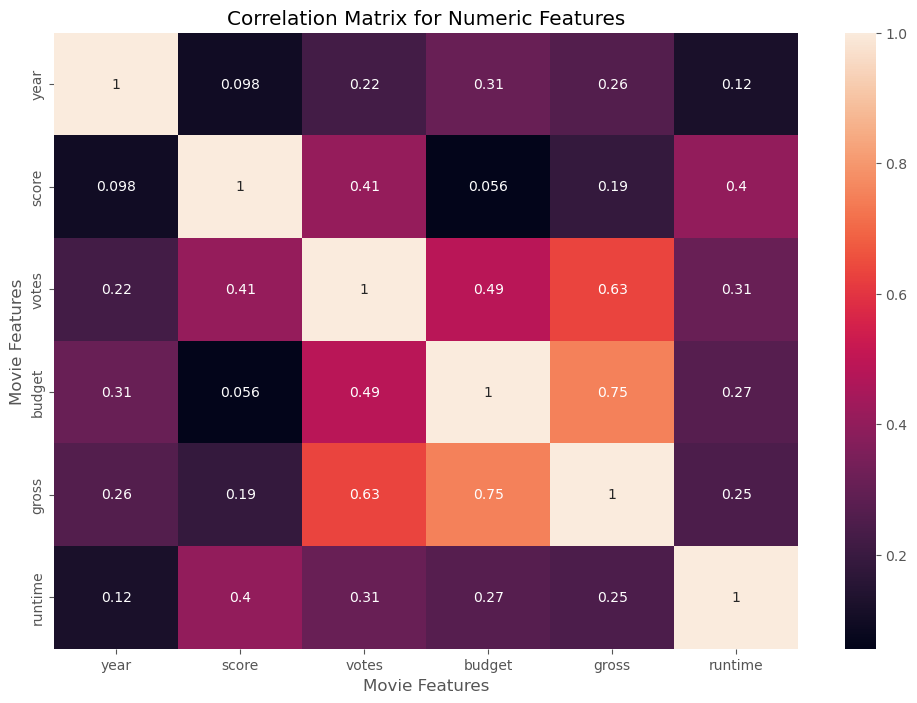

In [73]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [83]:
df_numerized = df

for col_name in df_numerized.columns:  
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes


df_numerized

year  score      votes     budget       gross  runtime
5445  2009    7.8  1100000.0  237000000  2847246203    162.0
7445  2019    8.4   903000.0  356000000  2797501328    181.0
3045  1997    7.8  1100000.0  200000000  2201647264    194.0
6663  2015    7.8   876000.0  245000000  2069521700    138.0
7244  2018    8.4   897000.0  321000000  2048359754    149.0
7480  2019    6.9   222000.0  260000000  1670727580    118.0
6653  2015    7.0   593000.0  150000000  1670516444    124.0
6043  2012    8.0  1300000.0  220000000  1518815515    143.0
6646  2015    7.1   370000.0  190000000  1515341399    137.0
7494  2019    6.8   148000.0  150000000  1450026933    103.0
6644  2015    7.3   777000.0  250000000  1402809540    141.0
7247  2018    7.3   661000.0  200000000  1347597973    134.0
5845  2011    8.1   790000.0  125000000  1342321665    130.0
7075  2017    7.0   581000.0  317000000  1332698830    152.0
7271  2018    6.2   277000.0  170000000  1310466296    128.0
6262  2013    7.4   585000.0  150000000  1281508100    102.0
7072  2017    7.1   283000.0  160000000  1264434525    129.0
7281  2018    7.6   263000.0  200000000  1244639527    118.0
7055  2017    6.6   214000.0  250000000  1236005118    136.0
6244  2013    7.1   779000.0  200000000  1214811252    130.0
6688  2015    6.4   218000.0   74000000  1159444662     91.0
6846  2016    7.8   694000.0  250000000  1153337496    147.0
7250  2018    6.9   404000.0  160000000  1148485886    143.0
4245  2003    8.9  1700000.0   94000000  1146030912    201.0
7458  2019    7.5   359000.0  160000000  1131927996    129.0
7456  2019    6.8   478000.0  160000000  1128462972    123.0
5878  2011    6.2   390000.0  195000000  1123794079    154.0
6059  2012    7.7   642000.0  200000000  1108569499    143.0
6494  2014    5.6   302000.0  210000000  1104054072    165.0
2448  1994    8.5   970000.0   45000000  1083720877     88.0
6047  2012    8.4  1600000.0  250000000  1081142612    164.0
7463  2019    6.5   394000.0  275000000  1078232589    141.0
7450  2019    8.4  1000000.0   55000000  1074427370    122.0
7488  2019    7.7   217000.0  200000000  1073394593    100.0
5685  2010    8.2   776000.0  200000000  1066970811    103.0
4852  2006    7.3   668000.0  225000000  1066179747    151.0
6869  2016    7.8   572000.0  200000000  1056057720    133.0
7481  2019    6.9   239000.0  183000000  1050693953    128.0
5860  2011    6.6   492000.0  250000000  1045713802    136.0
7140  2017    6.3   119000.0   80000000  1034800131     89.0
2245  1993    8.1   894000.0   63000000  1033928303    127.0
6908  2016    7.3   250000.0  200000000  1028570942     97.0
3451  1999    6.5   748000.0  115000000  1027082707    136.0
5667  2010    6.4   392000.0  200000000  1025468216    108.0
6863  2016    8.0   450000.0  150000000  1024121104    108.0
6045  2012    7.8   773000.0  180000000  1017003568    169.0
3843  2001    7.6   685000.0  125000000  1006968171    152.0
5243  2008    9.0  2400000.0  185000000  1005973645    152.0
5652  2010    7.7   495000.0          0   977043483    146.0
6311  2013    7.3   377000.0   76000000   970766005     98.0
6905  2016    7.4   264000.0  175000000   966554929    106.0
7051  2017    6.9   336000.0   90000000   962542945    119.0
6455  2014    7.4   487000.0  250000000   962182865    144.0
5060  2007    7.1   608000.0  300000000   960996492    169.0
6253  2013    7.8   615000.0  225000000   959007513    161.0
4048  2002    8.7  1500000.0   94000000   947495095    179.0
5051  2007    7.5   527000.0  150000000   942172396    138.0
4259  2003    8.1   972000.0   94000000   940352645    100.0
5451  2009    7.6   492000.0  250000000   934454096    153.0
4476  2004    7.2   431000.0  150000000   928760770     93.0
7246  2018    7.9   476000.0   52000000   911902649    134.0
3845  2001    8.8  1700000.0   93000000   897690072    178.0
4643  2005    7.7   566000.0  150000000   896678241    157.0
5057  2007    6.2   513000.0  258000000   894983373    139.0
5539  2009    6.9   230000.0   90000000  

In [98]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

year     year       1.000000
         score      0.097995
         votes      0.222945
         budget     0.309212
         gross      0.261900
         runtime    0.120811
score    year       0.097995
         score      1.000000
         votes      0.409182
         budget     0.055665
         gross      0.186392
         runtime    0.399451
votes    year       0.222945
         score      0.409182
         votes      1.000000
         budget     0.486862
         gross      0.632834
         runtime    0.309212
budget   year       0.309212
         score      0.055665
         votes      0.486862
         budget     1.000000
         gross      0.750157
         runtime    0.269510
gross    year       0.261900
         score      0.186392
         votes      0.632834
         budget     0.750157
         gross      1.000000
         runtime    0.245235
runtime  year       0.120811
         score      0.399451
         votes      0.309212
         budget     0.269510
         gross

In [100]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget   score      0.055665
score    budget     0.055665
year     score      0.097995
score    year       0.097995
runtime  year       0.120811
year     runtime    0.120811
gross    score      0.186392
score    gross      0.186392
year     votes      0.222945
votes    year       0.222945
gross    runtime    0.245235
runtime  gross      0.245235
gross    year       0.261900
year     gross      0.261900
runtime  budget     0.269510
budget   runtime    0.269510
year     budget     0.309212
budget   year       0.309212
votes    runtime    0.309212
runtime  votes      0.309212
         score      0.399451
score    runtime    0.399451
votes    score      0.409182
score    votes      0.409182
votes    budget     0.486862
budget   votes      0.486862
gross    votes      0.632834
votes    gross      0.632834
budget   gross      0.750157
gross    budget     0.750157
year     year       1.000000
budget   budget     1.000000
votes    votes      1.000000
score    score      1.000000
gross    gross

In [102]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross    votes      0.632834
votes    gross      0.632834
budget   gross      0.750157
gross    budget     0.750157
year     year       1.000000
budget   budget     1.000000
votes    votes      1.000000
score    score      1.000000
gross    gross      1.000000
runtime  runtime    1.000000
dtype: float64

In [103]:
#Low Correlation Observed Among Company Data